In [2]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
crypto_df = pd.read_csv(
    Path("/Users/samibsata/Desktop/crypto_clustering/Resources/crypto_market_data.csv"),
    index_col='coin_id'    
)

crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [4]:
crypto_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
crypto_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [6]:
model = StandardScaler()
scaled_crypto = model.fit_transform(crypto_df)

print(scaled_crypto[0:5])

[[ 0.50852937  0.49319307  0.77220043  0.23545963 -0.0674951  -0.35595348
  -0.25163688]
 [ 0.18544589  0.93444504  0.55869212 -0.05434093 -0.27348273 -0.11575947
  -0.19935211]
 [ 0.02177396 -0.70633685 -0.02168042 -0.06103015  0.00800452 -0.55024692
  -0.28206051]
 [-0.04076438 -0.81092807  0.24945797 -0.05038797 -0.37316402 -0.45825882
  -0.29554614]
 [ 1.19303608  2.00095907  1.76061001  0.54584206 -0.29120287 -0.49984776
  -0.27031695]]


In [7]:
scaled_crypto_df = pd.DataFrame(scaled_crypto, columns=["price_change_24h", "price_change_7d", "price_change_14d", "price_change_30d", "price_change_60d", "price_change_200d", "price_change_1y"])

scaled_crypto_df = scaled_crypto_df.set_index(crypto_df.index)

scaled_crypto_df.head()


,price_change_24h,price_change_7d,price_change_14d,price_change_30d,price_change_60d,price_change_200d,price_change_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [23]:
k = list(range(1,11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_crypto_df)
    inertia.append(k_model.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

elbow_curve = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    xticks=k
)

In [16]:
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


# Determining the k value/elbow point

In [ ]:
# First way is to find the point on the elbow curve that is the furthest from a straight
# line between the inertia end points
endpoints = df_elbow.iloc[[0,-1]].hvplot.line(
    x = "k",
    y = "inertia",
    xticks = k
)

elbow_curve * endpoints

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

Elbow at k = 4


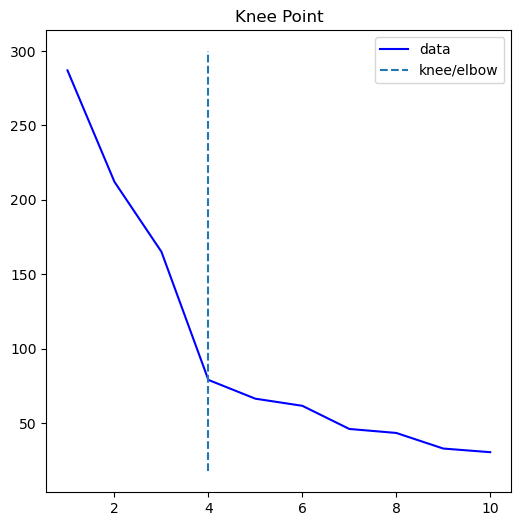

In [ ]:
# Second way is to use kneed library to have it determine it for you

from kneed import KneeLocator

kl = KneeLocator(k, inertia, curve="convex", direction="decreasing")
print("Elbow at k =", kl.knee)

kl.plot_knee()

### The best value for k is 4

In [ ]:
model = KMeans(n_clusters=4, random_state=1)
model.fit()

KMeans(n_clusters=4, random_state=1)